In [1]:
#3.30 velocities [110, 106, 104, 100, 97]
#4.00 velocities [115, 111, 110, 108, 104] [113, 111, 108, 105, 102]


#For 6.00, flat topped is best fit!!!!! (breedte ~350Å)

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import add_funcs_171123 as af
import scipy.integrate as integrate
from scipy.interpolate import make_interp_spline, BSpline
from scipy.optimize import curve_fit
from astropy.io import ascii

In [3]:
import matplotlib
plt.style.use('seaborn-dark-palette')
font = {'size'   : 16}
matplotlib.rc('font', **font)

/tmp/ipykernel_28065/270944681.py:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-dark-palette')


In [4]:
project_names = ["SUMO_Projects_v2p0/400d"]
spectrum_names = ["/spectrum_he3p30_AJ_40_60.datrun001", "/spectrum_he4p00_AJ_18_82.datrun001",
                 "/spectrum_he5p00_AJ_10_90.datrun001", "/spectrum_he6p00_AJ_10_90.datrun001",
                 "/spectrum_he8p00_AJ_10_90.datrun001"]
colours = ['blue', 'red', 'green'] #for the plotting
non_comparative_plot_name = 'no_nii.png'
comparative_plot_name = 'no_nii.png'
git_folder_loc = '/home/stba7609/'
zoom = [4000, 8000] #Give the region to be zoomed in at.

wavelengths, fluxes, NII_fluxes, OI_fluxes, CI_fluxes, CaII_fluxes = [], [], [], [], [], []
NiII_fluxes, FeI_fluxes = [], []

for i in range(len(project_names)):
    for j in range(len(spectrum_names)):
        spectrum_path = git_folder_loc + "NII_nebular_phase/SUMO_results/" + project_names[i]
        data = ascii.read(spectrum_path + spectrum_names[j])

        wavelength_raw = data['col1'] #In Ångström
        flux_raw = data['col2'] #In erg s-1 cm-2 Å-1
        NII_flux_raw = data['col15'] #See ABIN Codes on github
        OI_flux_raw = data['col19']
        CI_flux_raw = data['col34']
        CaII_flux_raw = data['col55']
        NiII_flux_raw = data['col71']
        FeI_flux_raw = data['col59']

        filter1 = (wavelength_raw < zoom[1])*(wavelength_raw > zoom[0])
        filter2 = ...

        wavelength = wavelength_raw[filter1]
        flux = flux_raw[filter1]
        NII_flux = NII_flux_raw[filter1]
        OI_flux = OI_flux_raw[filter1]
        CI_flux = CI_flux_raw[filter1]
        CaII_flux = CaII_flux_raw[filter1]
        NiII_flux = NiII_flux_raw[filter1]
        FeI_flux = FeI_flux_raw[filter1]

        wavelengths.append(wavelength)
        fluxes.append(flux)
        NII_fluxes.append(NII_flux)
        OI_fluxes.append(OI_flux)
        CI_fluxes.append(CI_flux)
        CaII_fluxes.append(CaII_flux)
        NiII_fluxes.append(NiII_flux)
        FeI_fluxes.append(FeI_flux)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


0
1
2
3
4
A plot with the same name already exists. Do you want to overwrite it? (y/n)n
Okay! The plot is not saved. Be sure to change the variable 'plot_name' at the top of the script.


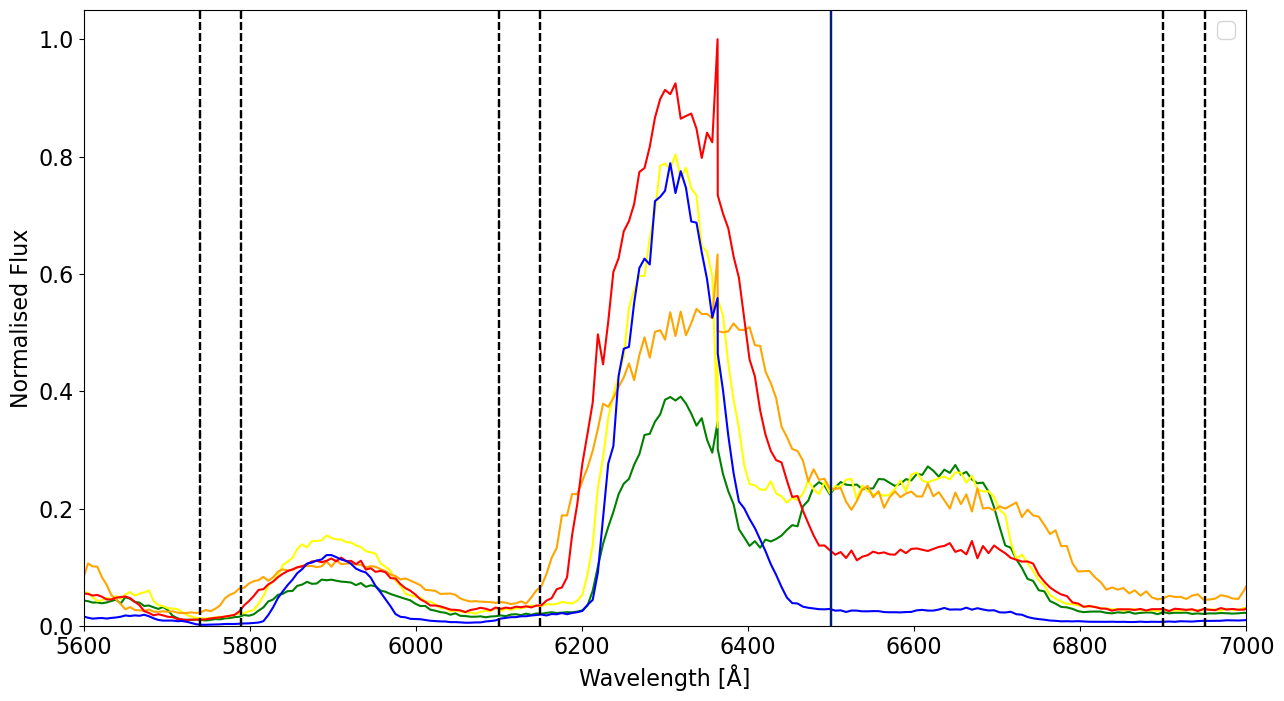

In [9]:
#This plot only plots the spectra

step_size = 1

fig, ax = plt.subplots(1, figsize = (15, 8))

#Create the main plot containing the absolute spectra
#====================================================================================================
trans = ax.get_xaxis_transform() #For easier plotting of labels of vertical lines later
colours = ['green', 'yellow', 'orange', 'red', 'blue']

for i in range(len(spectrum_names)):
    #ax.plot(wavelengths[i][::step_size], OI_fluxes[i]/np.max(fluxes[i]), label = project_names[i])
    #ax.plot(wavelengths[i][::step_size], CI_fluxes[i]/np.max(fluxes[i]), label = spectrum_names[i])
    #ax.plot(wavelengths[i][::step_size], NiII_fluxes[i][::step_size], label = 'NiII')
    #ax.plot(wavelengths[i][::step_size], FeI_fluxes[i][::step_size], label = 'FeI')
    #ax.plot(wavelengths[i][::step_size], NII_fluxes[i]/(np.max(NII_fluxes[i])), c = colours[i%5])
    #ax.plot(wavelengths[i][::step_size], NII_fluxes[i]/np.max(NII_fluxes[i]), label = spectrum_names[i])
    ax.plot(wavelengths[i][::step_size], fluxes[i][::step_size]/np.max(fluxes[i]), c = colours[i%5])
    
    wl1, wl2 = 5740, 5790
    wl3, wl4 = 6100, 6150
    wl5, wl6 = 6900, 6950 
    wl7, wl8 = 7950, 8000
    wl9, wl10 = 7520, 7570

    ax.axvline(x = wl1, linestyle = '--', c = 'k')
    ax.axvline(x = wl2, linestyle = '--', c = 'k')

    ax.axvline(x = wl3, linestyle = '--', c = 'k')
    ax.axvline(x = wl4, linestyle = '--', c = 'k')

    ax.axvline(x = wl5, linestyle = '--', c = 'k')
    ax.axvline(x = wl6, linestyle = '--', c = 'k')

    ax.axvline(x = wl7, linestyle = '--', c = 'k')
    ax.axvline(x = wl8, linestyle = '--', c = 'k')
    
    ax.axvline(x = wl9, linestyle = '--', c = 'k')
    ax.axvline(x = wl10, linestyle = '--', c = 'k')
    
    ax.axvline(x = 6500)

    mask1 = (wavelengths[i] > wl1) * (wavelengths[i] < wl2)
    mask2 = (wavelengths[i] > wl3) * (wavelengths[i] < wl4)
    mask3 = (wavelengths[i] > wl5) * (wavelengths[i] < wl6)
    mask4 = (wavelengths[i] > wl7) * (wavelengths[i] < wl8)

    #print('The four averages are left to right:')
    #print(np.mean(fluxes[i][mask1])/ np.max(fluxes[i]))
    #print(np.mean(fluxes[i][mask2])/ np.max(fluxes[i]))
    #print(np.mean(fluxes[i][mask3])/ np.max(fluxes[i]))
    #print(np.mean(fluxes[i][mask4])/ np.max(fluxes[i]))
    
    maskie = (wavelengths[i] > 6100) * (wavelengths[i] < 6900)
    cont_rem_flux = af.tot_continuum_remover(wavelengths[i], fluxes[i])
    print(i)
    #print('The true NII is:', integrate.cumtrapz(NII_fluxes[i][maskie], wavelengths[i][maskie])[-1]*100/integrate.cumtrapz(cont_rem_flux, wavelengths[i])[-1])

ax.set_xlabel('Wavelength [Å]')
ax.set_ylabel('Normalised Flux')
#ax.set_ylabel('Flux [10$^{-15}$ erg s$^{-1}$ cm$^{-2}$ Å$^{-1}$]')
#ax.axvline(x = 6725, linestyle = '--')

#Plot some important emission lines
line_names = np.array(["[O I] λλ 6300, 6364", "Mg I] λ 4571",
                       "[Ca II] λλ 7291, 7323", "Hα", "[N II] λλ 6548, 6583",
                       "[N II] λ 5747", "[C I] λ 8727"])
line_wl = np.array([6300, 4571, 7291, 6562, 6575, 5747, 8727])
active = np.array([True, True, True, False, True, True, True])

for i in range(len(line_wl)):
    if line_wl[i] > zoom[1] or line_wl[i] < zoom[0]:
        active[i] = False

#for i in range(len(line_names)):
#    if active[i] == True:
#        ax.axvline(x = line_wl[i], linestyle = '--', c = 'gray', lw = 1, alpha = 0.5)
#        fig.text(x = line_wl[i]-180, y = 0.6, s = line_names[i], transform = trans, rotation = 90)

#ax.set_xlim(5000, 8000)
ax.set_ylim(bottom = 0)

ax.legend()

#Save the plot
#====================================================================================================
isFile = os.path.isfile(non_comparative_plot_name)

if isFile == True:
    answer = input("A plot with the same name already exists. Do you want to overwrite it? (y/n)")
    while answer != 'y' and answer != 'n':
        answer = input("That is not a valid answer. The only valid answers are y and n")
    
    if answer == 'y':
        plt.savefig(non_comparative_plot_name)
    elif answer == 'n':
        print("Okay! The plot is not saved. Be sure to change the variable 'plot_name' at the top of the script.")
        
elif isFile == False:
    plt.savefig(non_comparative_plot_name)
#====================================================================================================
xrange = np.arange(6200, 6900, 1)
#ax.plot(xrange, af.thickshell(xrange, 6575, 0.15, 150, 100))


plt.xlim(5600, 7000)
plt.show()



In [31]:
print(len(wavelengths))

5


In [ ]:
#This plot plots the spectra and then compares them

fig, ax = plt.subplots(2, 1, gridspec_kw={'height_ratios': [3, 1]}, figsize = (15, 13), sharex = True)
#Create the main plot containing the absolute spectra
#====================================================================================================
ax[0].set_xlim(6000, 8000)
ax[1].set_xlim(6000, 8000)
trans = ax[0].get_xaxis_transform() #For easier plotting of labels of vertical lines later

for i in range(len(wavelengths)):
    ax[0].plot(wavelengths[i][::step_size], fluxes[i][::step_size]/np.max(fluxes[i][(wavelengths[i] > 5000) * (wavelengths[i] < 8000)]), label = spectrum_names[i], c= colours[i]) #/np.max(fluxes[i][::step_size])
    #ax[0].plot(wavelengths[i][::step_size], NII_fluxes[i][::step_size]/np.max(fluxes[i][::step_size]), label = project_names[i]+'_NII', c= colours[i], linestyle = '--', lw = 0.7)
    #ax[0].plot(wavelengths[i][::step_size], OI_fluxes[i][::step_size]*10**15, label = project_names[i]+'_OI', c= colours[i], linestyle = ':', lw = 0.7)

ax[0].set_ylabel('Normalised Flux')
#ax[0].set_ylabel('Flux [10$^{-15}$ erg s$^{-1}$ cm$^{-2}$ Å$^{-1}$]')

#Plot some important emission lines
line_names = np.array(["[O I] λλ 6300, 6364", "Mg I] λ 4571",
                       "[Ca II] λλ 7291, 7323", "Hα", "[N II] λλ 6548, 6583",
                       "[N II] λ 5747", "[C I] λ 8727"])
line_wl = np.array([6300, 4571, 7291, 6562, 6548, 5747, 8727])
active = np.array([True, False, True, False, True, False, False])

for i in range(len(line_wl)):
    if line_wl[i] > zoom[1] or line_wl[i] < zoom[0]:
        active[i] = False

for i in range(len(line_names)):
    if active[i] == True:
        ax[0].axvline(x = line_wl[i], linestyle = '--', c = 'gray', lw = 1, alpha = 0.5)
        fig.text(x = line_wl[i]-120, y = 0.7, s = line_names[i], transform = trans, rotation = 90)

#ax[0].set_xlim(6000, 8000)
ax[0].set_ylim(bottom = 0)

#width = 2*110
#ax.axvline(x = 6575+width)
#ax.axvline(x = 6575-width)

ax[0].legend()

#Create the secondary plot comparing the spectra 
#====================================================================================================
#for i in range(len(project_names)-1):
    #ax[1].plot(wavelengths[i+1][:1606:step_size], (fluxes[i+1][:1606:step_size]-fluxes[0][:1606:step_size])*10**15, label = project_names[i+1] + ' - ' + project_names[0])

for i in range(len(line_names)):
    if active[i] == True:
        ax[1].axvline(x = line_wl[i], linestyle = '--', c = 'gray', lw = 1, alpha = 0.5)
    
#ax[1].set_xlim(zoom[0], zoom[1])

ax[1].set_xlabel('Wavelength [Å]')
ax[1].set_ylabel('Flux difference [10$^{-15}$ erg s$^{-1}$ cm$^{-2}$ Å$^{-1}$]')

ax[1].legend()

#Save the plot
#====================================================================================================
isFile = os.path.isfile(comparative_plot_name)

if isFile == True:
    answer = input("A plot with the same name already exists. Do you want to overwrite it? (y/n)")
    while answer != 'y' and answer != 'n':
        answer = input("That is not a valid answer. The only valid answers are y and n")
    
    if answer == 'y':
        plt.savefig(comparative_plot_name)
    elif answer == 'n':
        print("Okay! The plot is not saved. Be sure to change the variable 'plot_name' at the top of the script.")
        
elif isFile == False:
    plt.savefig(comparative_plot_name)

#====================================================================================================

#ax[1].set_xlim(6000, 8000)
ax[0].set_ylim(0, 1.05)
plt.show()